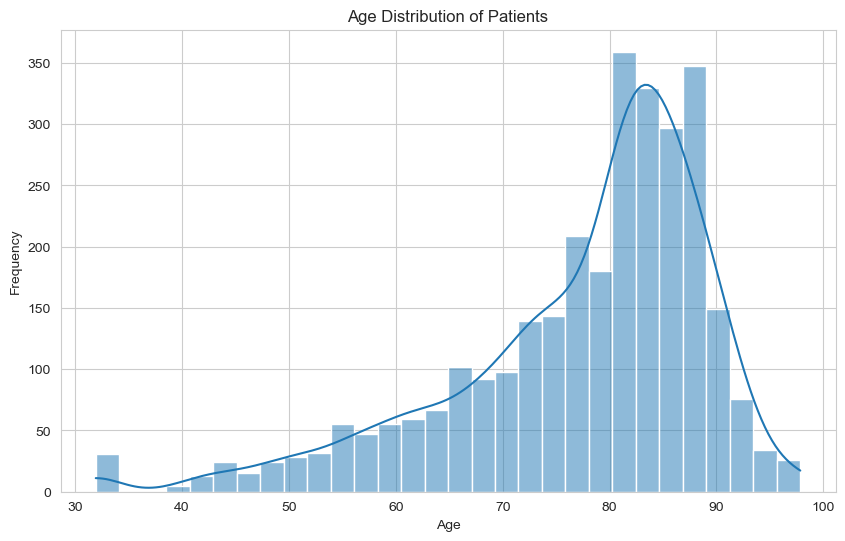

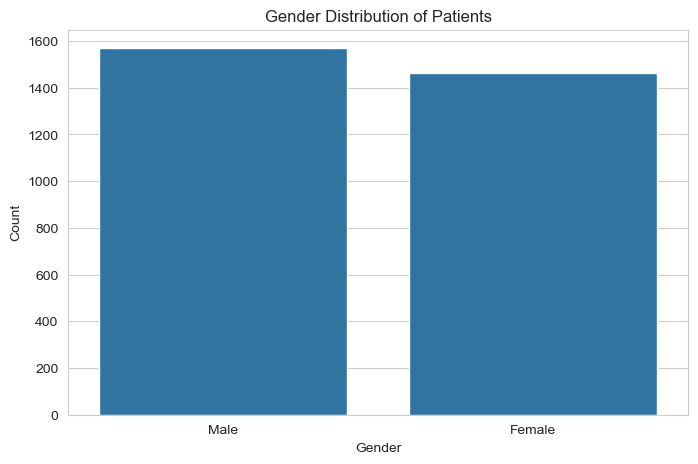

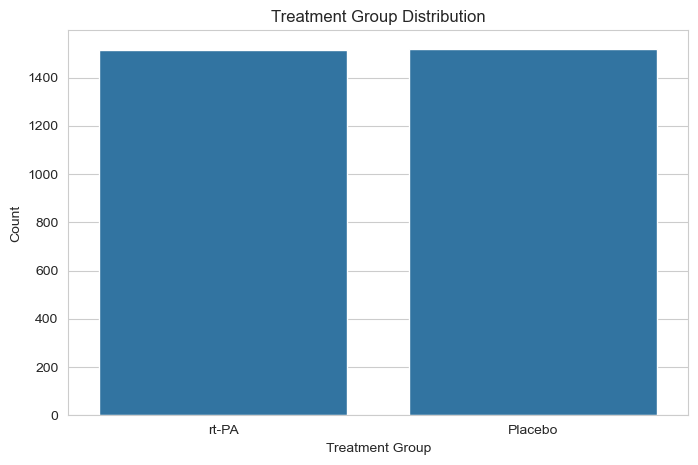

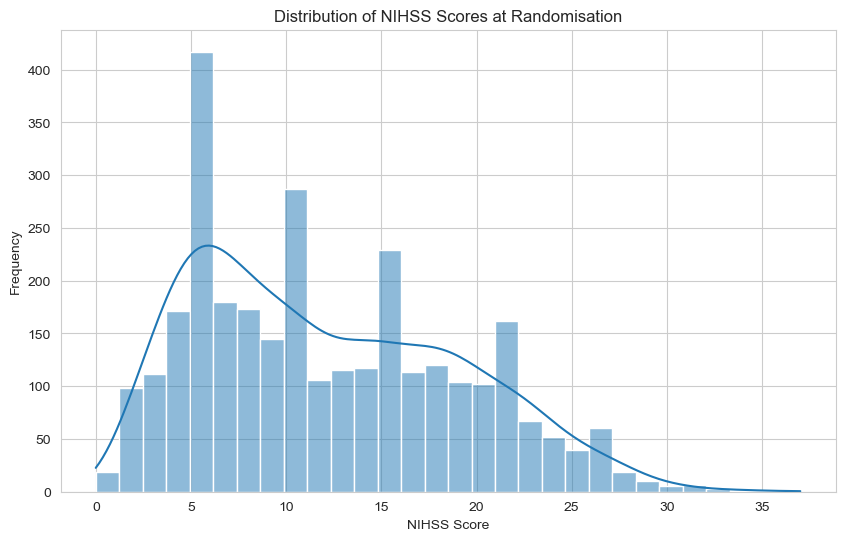

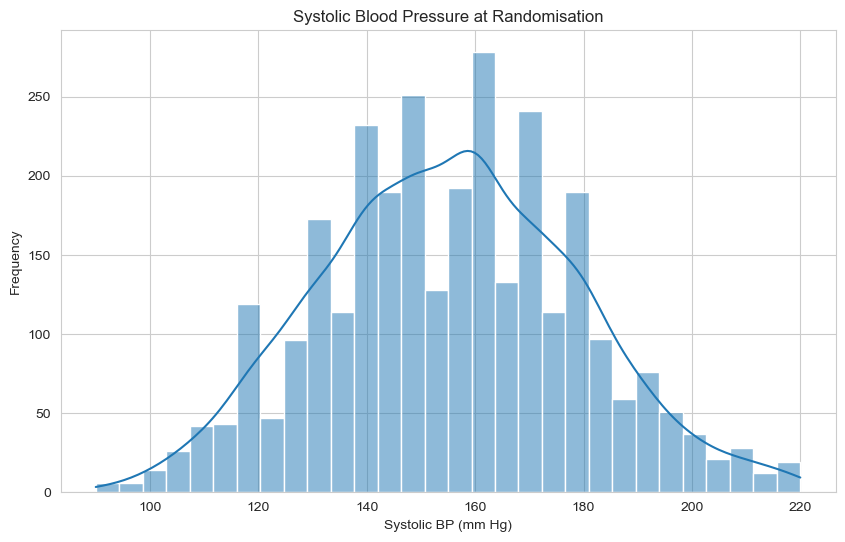

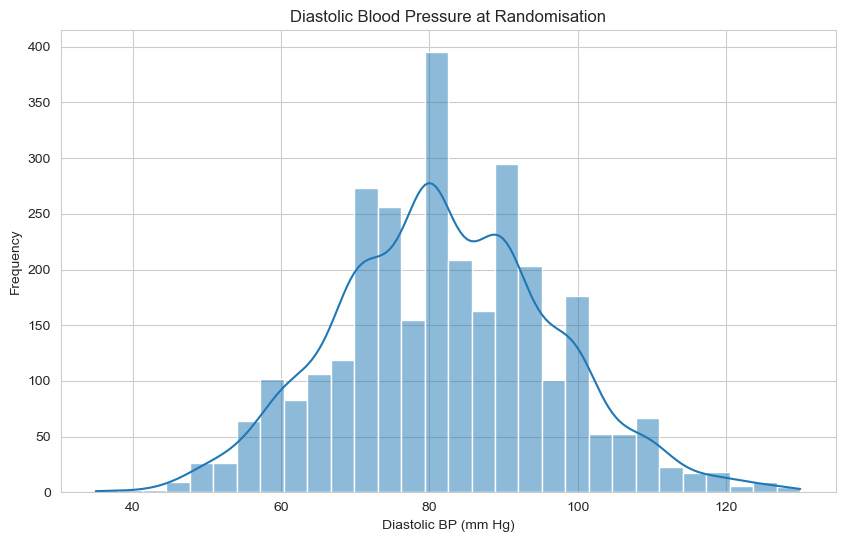

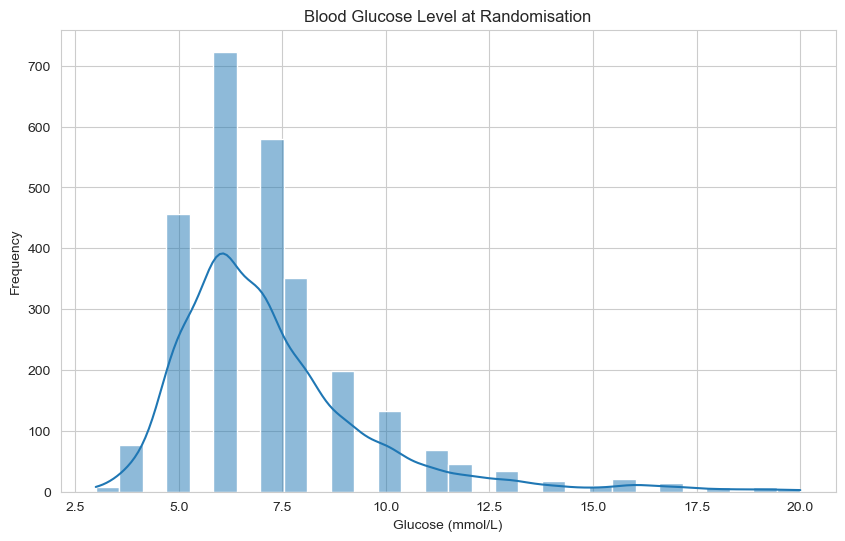

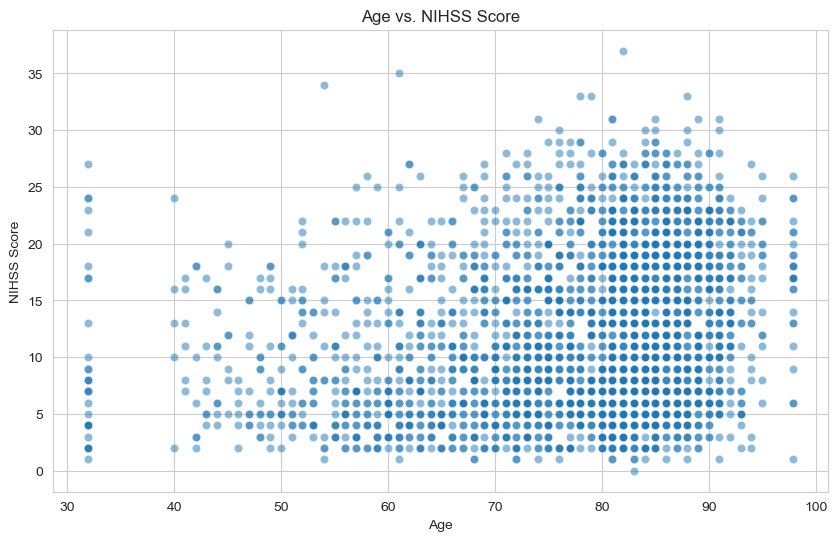

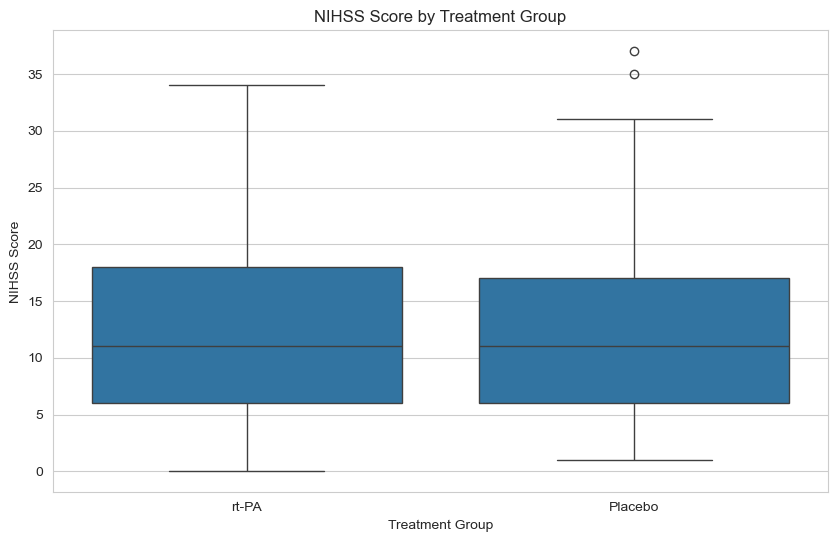

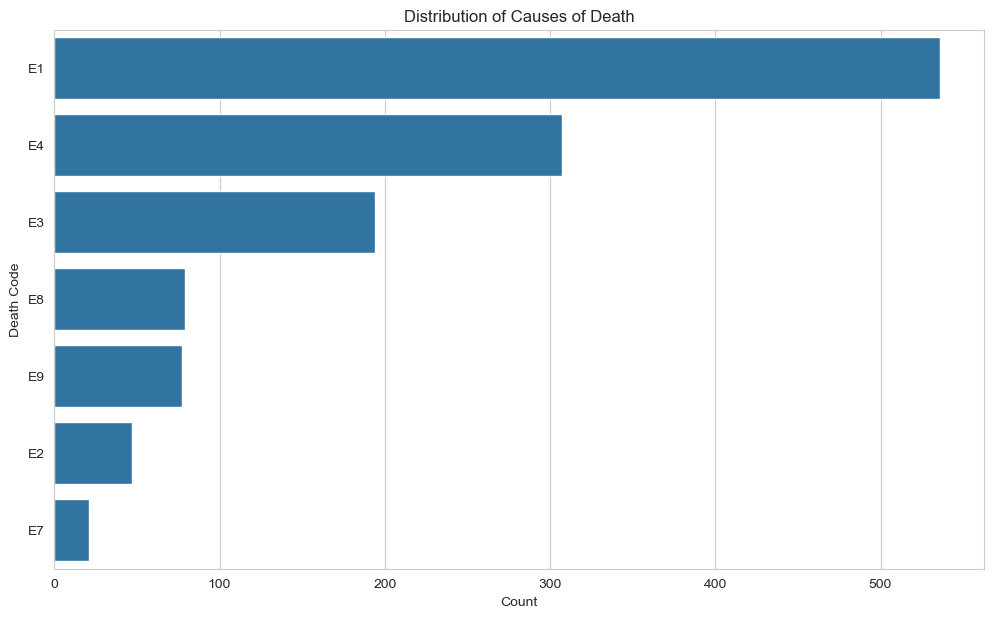

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_sas('data.sas7bdat')

# Decode byte strings to strings for object columns
for col in df.select_dtypes(include=['object']).columns:
    if df[col].apply(lambda x: isinstance(x, bytes)).any():
        df[col] = df[col].apply(lambda x: x.decode('utf-8') if isinstance(x, bytes) else x)

# Set the style for the plots
sns.set_style('whitegrid')

# --- Visualizations ---"

# 1. Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['age'].dropna(), kde=True, bins=30)
plt.title('Age Distribution of Patients')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('age_distribution.png')
plt.show()

# 2. Gender Distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='gender', data=df.replace({'gender': {1.0: 'Male', 2.0: 'Female'}}))
plt.title('Gender Distribution of Patients')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.savefig('gender_distribution.png')
plt.show()

# 3. Treatment Group Distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='treatment', data=df)
plt.title('Treatment Group Distribution')
plt.xlabel('Treatment Group')
plt.ylabel('Count')
plt.savefig('treatment_distribution.png')
plt.show()

# 4. NIHSS Score Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['nihss'].dropna(), kde=True, bins=30)
plt.title('Distribution of NIHSS Scores at Randomisation')
plt.xlabel('NIHSS Score')
plt.ylabel('Frequency')
plt.savefig('nihss_distribution.png')
plt.show()

# 5. Systolic Blood Pressure Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['sbprand'].dropna(), kde=True, bins=30)
plt.title('Systolic Blood Pressure at Randomisation')
plt.xlabel('Systolic BP (mm Hg)')
plt.ylabel('Frequency')
plt.savefig('sbp_distribution.png')
plt.show()

# 6. Diastolic Blood Pressure Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['dbprand'].dropna(), kde=True, bins=30)
plt.title('Diastolic Blood Pressure at Randomisation')
plt.xlabel('Diastolic BP (mm Hg)')
plt.ylabel('Frequency')
plt.savefig('dbp_distribution.png')
plt.show()

# 7. Blood Glucose Level Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['glucose'].dropna(), kde=True, bins=30)
plt.title('Blood Glucose Level at Randomisation')
plt.xlabel('Glucose (mmol/L)')
plt.ylabel('Frequency')
plt.savefig('glucose_distribution.png')
plt.show()

# 8. Age vs. NIHSS Score
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='nihss', data=df, alpha=0.5)
plt.title('Age vs. NIHSS Score')
plt.xlabel('Age')
plt.ylabel('NIHSS Score')
plt.savefig('age_vs_nihss.png')
plt.show()

# 9. NIHSS Score by Treatment Group
plt.figure(figsize=(10, 6))
sns.boxplot(x='treatment', y='nihss', data=df)
plt.title('NIHSS Score by Treatment Group')
plt.xlabel('Treatment Group')
plt.ylabel('NIHSS Score')
plt.savefig('nihss_by_treatment.png')
plt.show()

# 10. Deathcode Distribution
plt.figure(figsize=(12, 7))
sns.countplot(y='deathcode', data=df, order = df['deathcode'].value_counts().index)
plt.title('Distribution of Causes of Death')
plt.xlabel('Count')
plt.ylabel('Death Code')
plt.savefig('deathcode_distribution.png')
plt.show()